In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [18]:
data = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<Axes: >

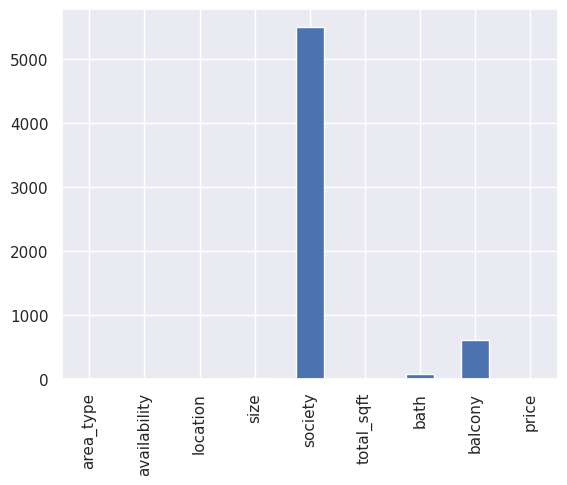

In [20]:
sns.set_theme()
data.isnull().sum().plot(kind = "bar")

In [21]:
data.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [22]:
data.drop("society", axis = 1).isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

<Axes: >

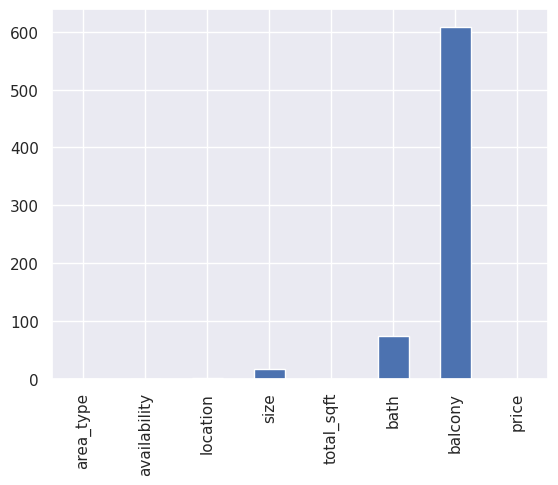

In [23]:
data.drop("society", axis = 1).isnull().sum().plot(kind = "bar")

In [24]:
data.drop("society", axis = 1, inplace = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [26]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [29]:
data.balcony = data.balcony.interpolate()

In [32]:
data = data.dropna()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
dtypes: float64(3), object(5)
memory usage: 931.4+ KB


In [37]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [38]:
data.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,0.5,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.0,17.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
dtypes: float64(3), object(5)
memory usage: 931.4+ KB


In [45]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7]

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
dtypes: float64(2), object(5)
memory usage: 827.9+ KB


In [48]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 13246 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13246 non-null  float64
dtypes: float64(1)
memory usage: 207.0 KB


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10596 entries, 4630 to 7317
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10596 non-null  object 
 1   availability  10596 non-null  object 
 2   location      10596 non-null  object 
 3   size          10596 non-null  object 
 4   total_sqft    10596 non-null  object 
 5   bath          10596 non-null  float64
 6   balcony       10596 non-null  float64
dtypes: float64(2), object(5)
memory usage: 662.2+ KB


In [59]:
ct = make_column_transformer(
    (MinMaxScaler(), [5, 6]),
    (OneHotEncoder(handle_unknown = 'ignore'), [0, 1, 2, 3, 4])
)

In [60]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(), [5, 6]),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 [0, 1, 2, 3, 4])])

In [61]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)